In [1]:
import pandas as pd
user = pd.read_csv('./data/user_list.csv')

## 신규 가입자 수 증가 추이

In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11577 entries, 0 to 11576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             11577 non-null  int64 
 1   register_date  11577 non-null  object
dtypes: int64(1), object(1)
memory usage: 181.0+ KB


In [26]:
user['register_date'] = user['register_date'].astype('datetime64')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11577 entries, 0 to 11576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             11577 non-null  int64         
 1   register_date  11577 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 181.0 KB


In [15]:
user['register_date'] = user['register_date'].dt.date
a = user.groupby('register_date')['no'].count()
a.to_csv('./a.csv')

스프레드시트로 일별 신규 가입자 및 누적 가입자 수 그래프 정리

In [27]:
user['register_year'] = user['register_date'].dt.year
user['register_month'] = user['register_date'].dt.month

In [28]:
# 월별 신규 가입자 수 정리
user.groupby(['register_year','register_month'])['no'].count()

register_year  register_month
2019           11                  33
               12                1569
2020           1                  578
               2                   13
               10                 388
               11                 755
               12                 445
2021           1                  380
               2                  739
               3                  927
               4                  604
               5                  407
               6                  317
               7                  407
               8                  533
               9                  458
               10                 383
               11                 395
               12                 341
2022           1                  341
               2                  284
               3                  322
               4                  327
               5                  316
               6                  291
               7    

## MAU 관찰

In [2]:
order = pd.read_csv('./data/order_sort.csv',index_col=0)

order = order.drop(columns=['board_station','alight_station','adult','teen','child','distance','fare','x','y'])

In [35]:
order.head(3)

,ID,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,board_adm,alight_adm,Trip
0,1,배차불가,NaN,2021/02,NaN,NaN,NaN,2021-02-15 00:00:25,운북동,운남동,0
1,1,배차불가,NaN,2021/02,NaN,NaN,NaN,2021-02-15 00:00:46,운북동,운남동,0
2,1,배차불가,NaN,2021/02,NaN,NaN,NaN,2021-02-15 00:00:59,운북동,운남동,0


In [33]:
order['call_time'] = order['call_time'].astype('datetime64')

In [34]:
order['call_time'] = order['call_time'].dt.strftime('%Y/%m')

In [38]:
df = pd.DataFrame(order.groupby("call_time").agg({"ID": pd.Series.nunique}))

C:\Users\happy\AppData\Local\Temp\ipykernel_16016\2832967932.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=45)


<AxesSubplot:xlabel='call_time', ylabel='ID'>

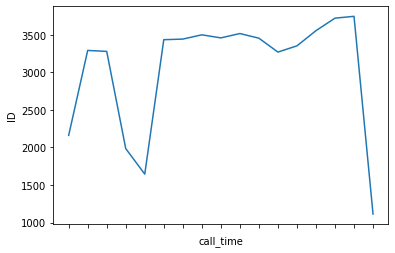

In [48]:
import seaborn as sns
plot = sns.lineplot(data = df, x = "call_time", y = "ID")
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plot

In [42]:
df.to_csv('./MAU.csv')

In [53]:
ride = order[order['suc_status']=='하차완료']
agg = pd.DataFrame(ride.groupby('call_time')['ID'].count())

C:\Users\happy\AppData\Local\Temp\ipykernel_16016\1014965155.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_2.set_xticklabels(plot.get_xticklabels(),rotation=45)


<AxesSubplot:xlabel='call_time', ylabel='ID'>

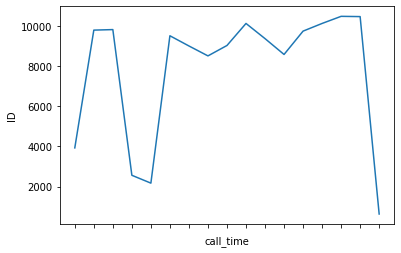

In [54]:
plot_2 = sns.lineplot(data = agg, x = "call_time", y = "ID")
plot_2.set_xticklabels(plot.get_xticklabels(),rotation=45)
plot_2

## 고객이탈률

In [9]:
order = order.drop(columns=['suc_status','suc_status_d','cancel_time','board_adm','alight_adm'])
firstorder = order.drop_duplicates(subset=['ID'], keep = 'first')
lastorder = order.drop_duplicates(subset=['ID'], keep='last')
churn = firstorder.merge(lastorder, left_on='ID', right_on='ID', suffixes=('_F', '_L'))

In [10]:
churn = churn.sort_values(['ID'])
churn.head(10)

,ID,call_time_F,board_time_F,alight_time_F,suc_time_F,Trip_F,call_time_L,board_time_L,alight_time_L,suc_time_L,Trip_L
0,1,2021-02-15 00:00:24,NaN,NaN,NaN,0,2021-03-25 12:03:57,NaN,NaN,NaN,34
1,2,2021-02-15 00:04:24,NaN,NaN,NaN,35,2021-02-17 18:28:29,NaN,NaN,NaN,47
2,3,2022-04-26 14:12:42,NaN,NaN,NaN,48,2022-04-26 14:12:42,NaN,NaN,NaN,48
3,4,2021-02-17 15:36:51,NaN,NaN,NaN,49,2021-03-24 11:42:54,NaN,NaN,NaN,71
4,5,2021-02-15 00:01:02,NaN,NaN,NaN,72,2021-09-03 12:03:37,NaN,NaN,NaN,79
5,6,2021-02-15 00:01:12,NaN,NaN,NaN,80,2021-12-14 13:24:31,2021-12-14 13:43:24,2021-12-14 13:50:48,2021-12-14 13:24:48,105
6,7,2021-02-15 00:00:35,NaN,NaN,NaN,106,2021-02-17 16:00:40,NaN,NaN,NaN,117
7,8,2022-05-03 10:49:43,NaN,NaN,NaN,118,2022-05-03 12:16:23,2022-05-03 12:23:16,2022-05-03 12:28:01,2022-05-03 12:16:34,123
8,9,2021-04-27 14:00:30,NaN,NaN,NaN,124,2021-04-27 15:09:21,2021-04-27 15:28:12,2021-04-27 15:39:08,2021-04-27 15:09:32,125
9,10,2021-02-24 17:44:06,NaN,NaN,NaN,126,2022-02-15 16:50:36,NaN,NaN,NaN,129


In [12]:
churn['call_time_F'] = churn['call_time_F'].astype('datetime64')
churn['call_time_L'] = churn['call_time_L'].astype('datetime64')
churn['retention'] = churn['call_time_L'] - churn['call_time_F']

In [13]:
churn.head()

,ID,call_time_F,board_time_F,alight_time_F,suc_time_F,Trip_F,call_time_L,board_time_L,alight_time_L,suc_time_L,Trip_L,retention
0,1,2021-02-15 00:00:24,NaN,NaN,NaN,0,2021-03-25 12:03:57,NaN,NaN,NaN,34,38 days 12:03:33
1,2,2021-02-15 00:04:24,NaN,NaN,NaN,35,2021-02-17 18:28:29,NaN,NaN,NaN,47,2 days 18:24:05
2,3,2022-04-26 14:12:42,NaN,NaN,NaN,48,2022-04-26 14:12:42,NaN,NaN,NaN,48,0 days 00:00:00
3,4,2021-02-17 15:36:51,NaN,NaN,NaN,49,2021-03-24 11:42:54,NaN,NaN,NaN,71,34 days 20:06:03
4,5,2021-02-15 00:01:02,NaN,NaN,NaN,72,2021-09-03 12:03:37,NaN,NaN,NaN,79,200 days 12:02:35


In [16]:
churn['retention'].describe()

count                          11577
mean     169 days 08:41:55.749330572
std      177 days 00:30:08.452779766
min                  0 days 00:00:00
25%                  0 days 04:56:04
50%                103 days 00:03:31
75%                315 days 00:21:38
max                502 days 17:10:51
Name: retention, dtype: object

In [23]:
leave = churn.loc[:,['ID','call_time_L','Trip_L']]
leave['call_time_L'] = leave['call_time_L'].dt.strftime('%Y/%m')

In [25]:
leave.groupby('call_time_L')['ID'].count()

call_time_L
2021/02     206
2021/03     485
2021/04     498
2021/05     303
2021/07      93
2021/08     493
2021/09     459
2021/10     493
2021/11     483
2021/12     543
2022/01     552
2022/02     520
2022/03     606
2022/04     806
2022/05    1150
2022/06    2773
2022/07    1114
Name: ID, dtype: int64

In [27]:
start = churn.loc[:,['ID','call_time_F','Trip_F']]
start['call_time_F'] = start['call_time_F'].dt.strftime('%Y/%m')
start.groupby('call_time_F')['ID'].count()

call_time_F
2021/02    2161
2021/03    1642
2021/04     938
2021/05     251
2021/07     463
2021/08     975
2021/09     707
2021/10     564
2021/11     578
2021/12     501
2022/01     516
2022/02     378
2022/03     443
2022/04     461
2022/05     478
2022/06     468
2022/07      53
Name: ID, dtype: int64